<a href="https://colab.research.google.com/github/AsifPeerazade/Mini_Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.96 s (started: 2021-06-24 13:45:17 +00:00)


In [ ]:
!pip install bing-image-downloader

time: 3.24 s (started: 2021-06-24 12:06:24 +00:00)


In [ ]:
!mkdir images

time: 113 ms (started: 2021-06-24 12:06:47 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("aeroplane" , limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/aeroplane


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.rd.com/wp-content/uploads/2020/01/GettyImages-1131335393-e1580493890249-scaled.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://1.bp.blogspot.com/-BXKO1VyjlWk/UA5yfCdFsII/AAAAAAAAH4E/K5M0ePZgOV0/s1600/Airplane_aeroplane_aircraft_jet_wallpapers+(30).jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://1.bp.blogspot.com/-0RJR9qpu2D8/UA50waJTocI/AAAAAAAAH6I/WbDWYn4TD3A/s1600/Airplane_aeroplane_aircraft_jet_wallpapers+(40).jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://4.bp.blogspot.com/-_ur8aZKwrOs/UA5zZ1CaCcI/AAAAAAAAH48/H8sUx3YF5MY/s1600/Airplane_aeroplane_aircraft_jet_wallpapers+(66).jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://1.bp.blogspot.com/-iWZuTbn7f5E/UA5zW7ra8iI/AAAAAAAAH4s/AYDd7Euys8I/s1600/Airplane_aeroplane_aircraft_jet_wallpapers+(54).jpg
[%] File Downloaded 

In [ ]:
from bing_image_downloader import downloader
downloader.download("train" , limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/train


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://lh3.googleusercontent.com/eZEYQjtvh4IZYXHsnJGaKFjY7D3G4Ti1V1Ae_e-vlNFrg0x4g6duxSmpiCpZR7vndLG8sbIaWu2UxNbWipIEt0dT=s1000
[%] File Downloaded !

[%] Downloading Image #2 from http://www.truenorthmark.com/blog/wp-content/uploads/2013/06/Choo-Choo.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://onlyinark.com/wp-content/uploads/2016/01/Excursion-Train.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://4.bp.blogspot.com/-YR442hceVwA/UqXTnwPFMLI/AAAAAAAAAfs/wZOiE7MNXMc/s1600/IMG_3010.JPG
[%] File Downloaded !

[%] Downloading Image #5 from https://usercontent1.hubstatic.com/7960378_f496.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://s22658.pcdn.co/wp-content/uploads/2018/07/trainchasing.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/originals/21/73/b2/2173b28d62f6f3024aa92

In [ ]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['aeroplane','train']

for category in CATEGORIES:
    class_num  = CATEGORIES.index(category) #Label encoding the values
    path = os.path.join(DATADIR,category)  #Create path to use all the images
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        #print(img_array.shape)
        #plt.imshow(img_array)
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 21.2 s (started: 2021-06-24 13:45:36 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 14.6 ms (started: 2021-06-24 13:46:00 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)

time: 7.69 ms (started: 2021-06-24 13:46:05 +00:00)


<BarContainer object of 2 artists>

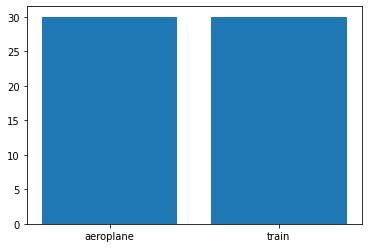

time: 218 ms (started: 2021-06-24 13:46:10 +00:00)


In [ ]:
plt.bar(CATEGORIES,count)

In [ ]:
#Split data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 51.8 ms (started: 2021-06-24 13:46:16 +00:00)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

accuracy_score(y_test, y_pred)

0.8333333333333334

time: 538 ms (started: 2021-06-24 13:46:21 +00:00)


In [ ]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

time: 10.7 ms (started: 2021-06-24 13:46:25 +00:00)


In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 9.63 ms (started: 2021-06-24 13:46:30 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 4.24 ms (started: 2021-06-24 13:46:33 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.8333333333333334

time: 15.6 ms (started: 2021-06-24 13:46:37 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[8, 0],
       [3, 7]])

time: 14.2 ms (started: 2021-06-24 13:46:39 +00:00)


In [ ]:
#Save the model using pickle
import pickle
pickle.dump(gnb,open('img_model.p','wb'))

time: 40.7 ms (started: 2021-06-24 13:46:45 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 4.37 ms (started: 2021-06-24 13:46:48 +00:00)


Enter your urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROYA056Ir3A0sxx-5cSnDUNb_XDUr7L3imVw&usqp=CAU
(159, 318, 3)
 Predicted output: train


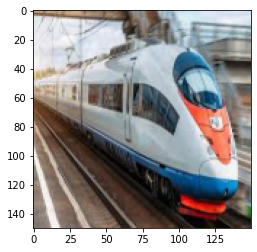

time: 4.4 s (started: 2021-06-24 12:53:02 +00:00)


In [ ]:
#Testing a brand new image

flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' Predicted output: {y_out}')